In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = df.drop('target', axis = 1)
y = df.target

In [3]:
def minknowski_distance(a, b, p = 1):
    dim = len(a)
    distance = 0
    for i in range(dim):
        distance += (abs(a[i]-b[i])**p)
        
    distance = distance ** (1/p)
    
    return distance

test_pt = [4.8, 2.7, 2.5, 0.7]

distances = []

for i in X.index:
    distances.append(minknowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index = X.index, columns = ['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [4]:
df_nn = df_dists.sort_values(by = ['dist'], axis = 0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [5]:
from collections import Counter

counter = Counter(y[df_nn.index])

print(counter.most_common()[0][0])

1


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    
    y_hat_test = []
    
    for test_point in X_test:
        distance = []
        for train_point in X_train:
            distance.append(minknowski_distance(test_point, train_point, p))
        
        df_dists = pd.DataFrame(data = distance, index = y_train.index, columns = ['dist'])
        temp_df = df_dists.sort_values(by = ['dist'], axis = 0)[:k]
        counter = Counter(y_train[temp_df.index])
        prediction = counter.most_common()[0][0]
        y_hat_test.append(prediction)
        
    return y_hat_test

y_hat_test = knn_predict(X_train, X_test,y_train, y_test, k = 5, p = 1)         

In [8]:
y_hat_test

[0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0]

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_hat_test))

0.9736842105263158


In [10]:
accuracies = []
for k in range(1, 100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p = 1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

Text(0, 0.5, 'Accuracy (%)')

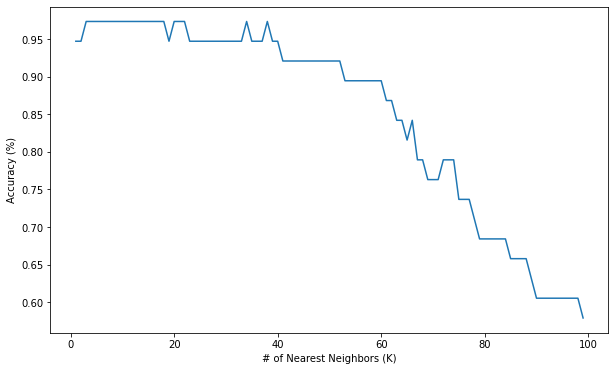

In [11]:
# Plot 
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (K)')
ax.set_ylabel('Accuracy (%)')